In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

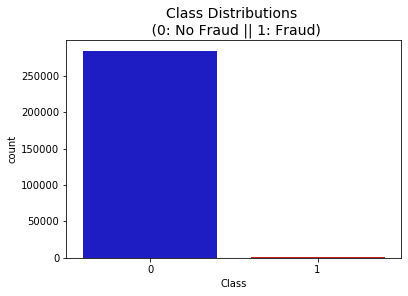

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
257859,0.041920,0.865635,2.304821,-1.423304,-1.164655,-1.596228,-1.120324,-0.588607,-1.100182,-0.148466,...,-0.458023,-0.194191,-0.140130,0.244076,0.529826,-0.161349,-0.181844,-0.005119,-0.046883,0
204503,0.870258,0.594720,-3.158990,1.765452,-3.390168,0.987410,-1.509930,-1.280952,-2.719557,0.718325,...,-0.022590,1.120533,1.605085,-0.618637,-0.251283,-0.240528,-0.004327,-0.235477,0.018129,1
47218,-0.293440,-0.488211,1.296653,0.696053,-0.698704,1.155179,0.485034,-0.766111,0.287600,-0.186209,...,-0.077045,-0.124041,-0.284566,-0.226188,-0.591578,0.799872,-0.275007,0.033512,0.048779,0
6820,-0.293440,-0.893784,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,...,0.500779,0.645103,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,1
43160,3.507441,-0.508641,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,9.643419,...,-1.614660,2.714045,-0.101355,-0.439666,0.519514,0.789328,0.064357,-1.621386,-1.104819,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


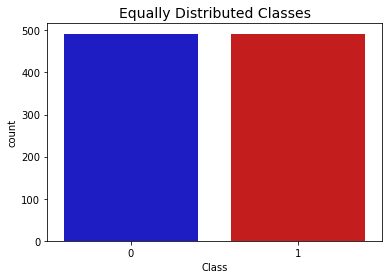

In [11]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

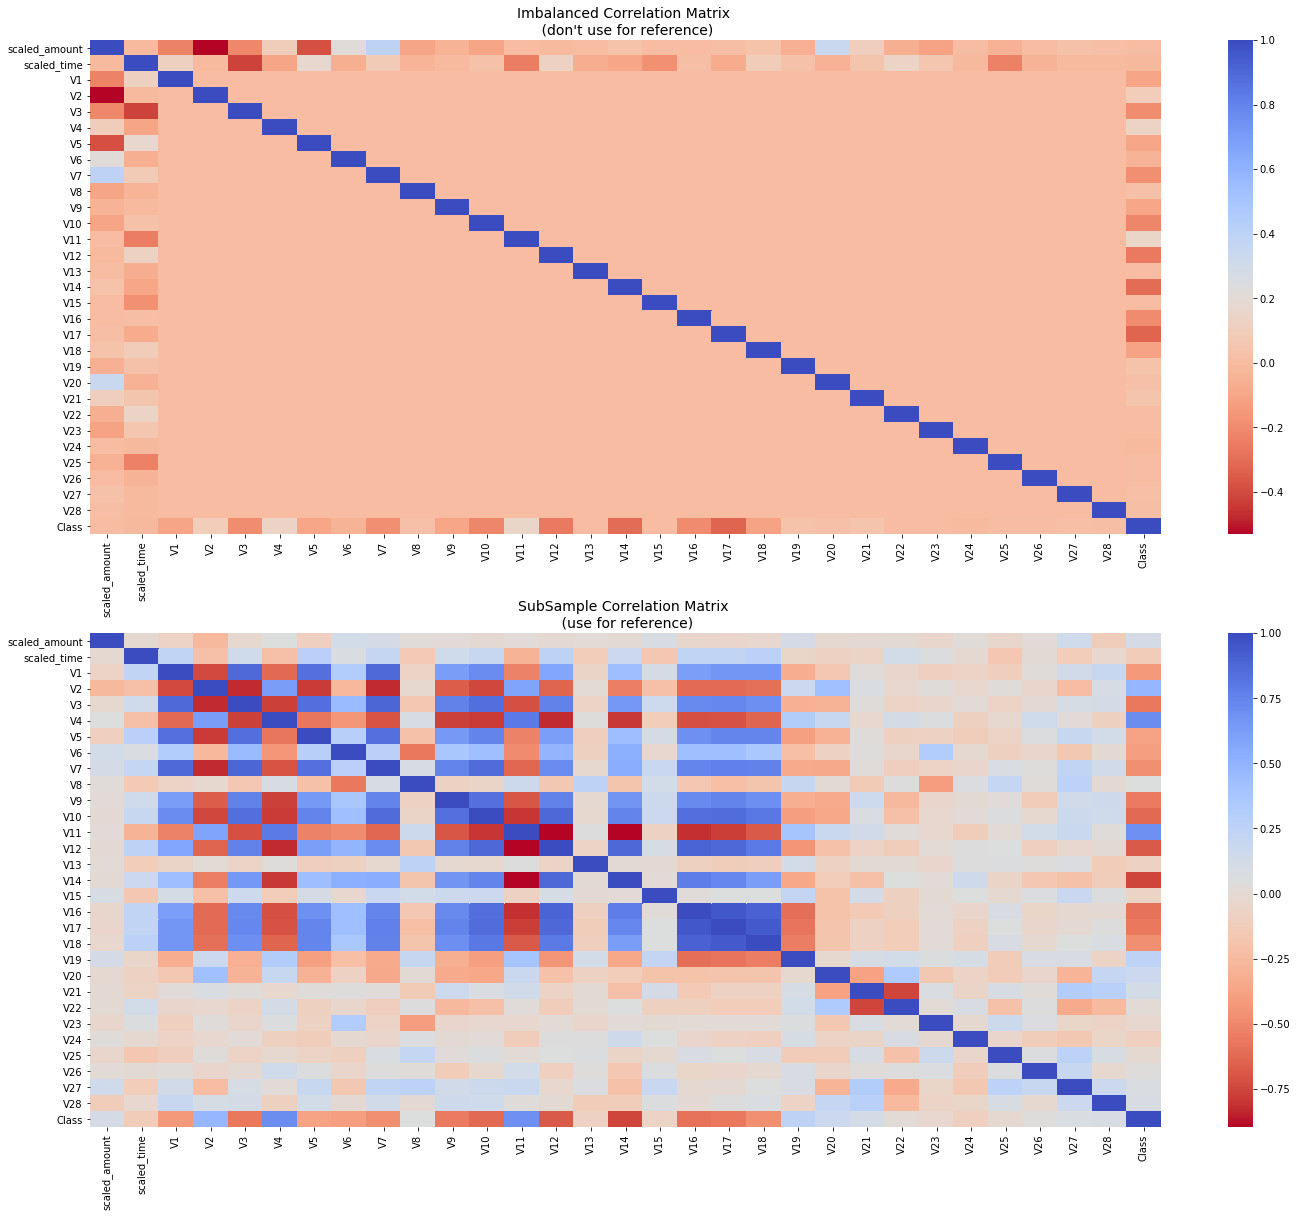

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Boxplot (Ящик с усами) параметр 2')

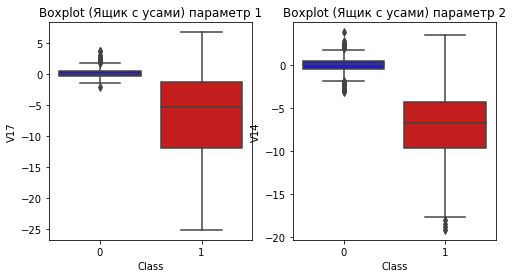

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(ncols=2, figsize=(8,4))

sns.boxplot(x="Class", y="V17", data=new_df, 
            palette=colors, ax=axes[0])
axes[0].set_title('Boxplot (Ящик с усами) параметр 1')

sns.boxplot(x="Class", y="V14", data=new_df, 
            palette=colors, ax=axes[1])
axes[1].set_title('Boxplot (Ящик с усами) параметр 2')


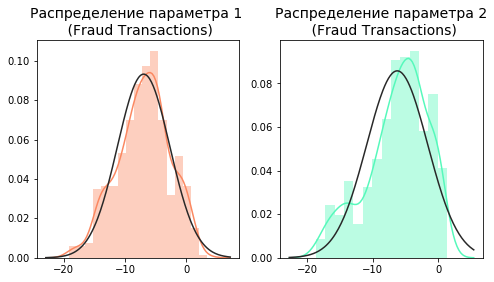

In [52]:
from scipy.stats import norm
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 4))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Распределение параметра 1 \n (Fraud Transactions)', 
              fontsize=14)
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Распределение параметра 2\n (Fraud Transactions)', 
              fontsize=14)
plt.show()

In [28]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

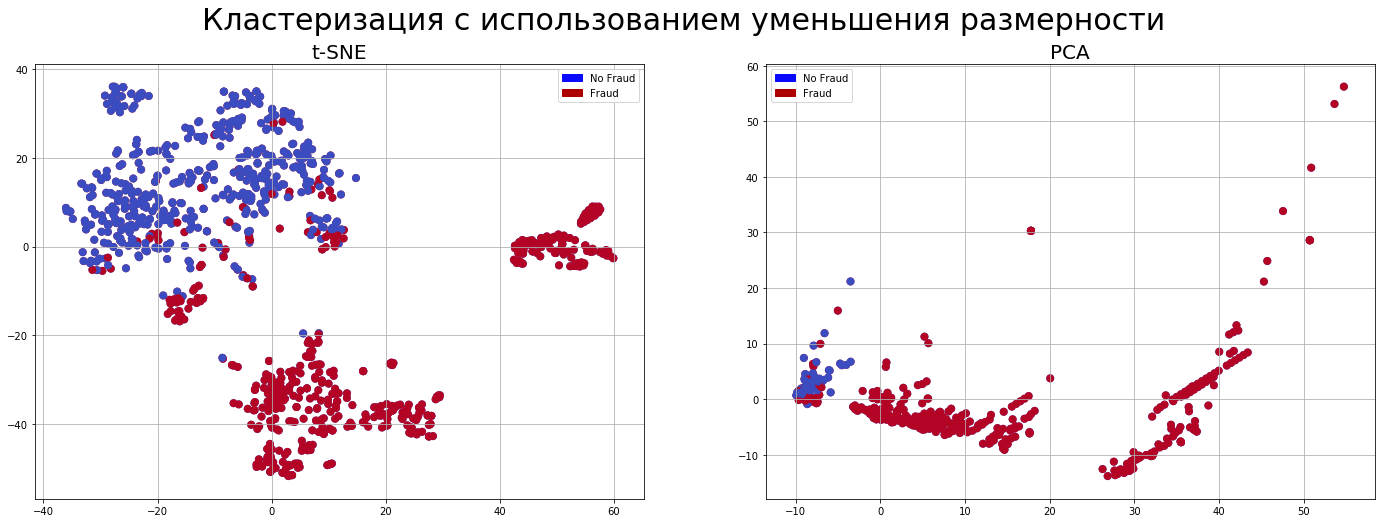

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))
f.suptitle('Кластеризация с использованием уменьшения размерности', fontsize=30)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')
# t-SNE
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=20)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])
# PCA
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=20)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])
plt.show()

In [30]:
X_reduced_tsne.shape

(984, 2)

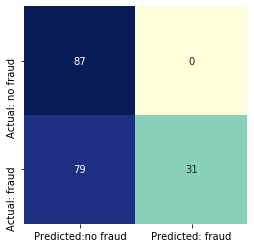

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=20).fit(X_train)
a=kmeans.predict(X_test)

def plot_confusion(true_labels, preds):
    cm = confusion_matrix(true_labels, preds)
    conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:no fraud','Predicted: fraud'],
                               index=['Actual: no fraud','Actual: fraud'])
    plt.figure(figsize = (4,4))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);
plot_confusion(y_test, a)

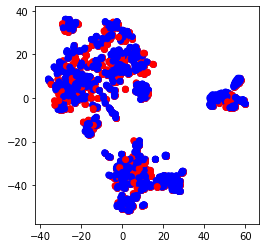

In [46]:
from sklearn.cluster import DBSCAN
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X_reduced_tsne, y, test_size=0.2, random_state=42)
clustering = DBSCAN(eps=1, min_samples=2).fit(X_reduced_tsne)
predicted_labels=np.array([1 if label == -1 else 0 for label in clustering.labels_])
colours = {} 
colours[0] = 'b'
colours[1] = 'r'
plt.figure(figsize =(4, 4)) 
cvec = [colours[label] for label in predicted_labels] 
r = plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], color ='b'); 
g = plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], color ='r'); 
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c = cvec) 
plt.show() 

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion(true_labels, preds):
    cm = confusion_matrix(true_labels, preds)
    conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:no fraud',
                                                     'Predicted: fraud'], 
                               index=['Actual: no fraud','Actual: fraud'])
    plt.figure(figsize = (5,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);
plot_confusion(y, predicted_labels)

In [47]:
fraud_df = len(df.loc[df['Class'] == 1])
non_fraud_df = len(df.loc[df['Class'] == 0])

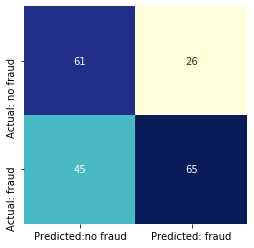

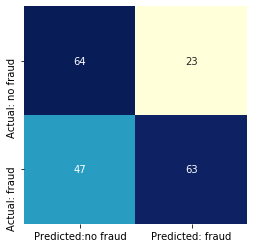

In [50]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

fraud_df = len(df.loc[df['Class'] == 1])
non_fraud_df = len(df.loc[df['Class'] == 0])

#IsolationForest
out_dist_part = non_fraud_df / (non_fraud_df + fraud_df)
model = IsolationForest(n_estimators=100, contamination=0.5 , max_features=0.4, bootstrap=True)
model.fit(X_train)
predicted_labels = model.predict(X_test)
predicted_labels = np.array([1 if label == -1 else 0 for label in predicted_labels])
plot_confusion(y_test, predicted_labels)

#OneClassSVM
model = OneClassSVM(nu=0.5)
model.fit(X_train)
preds = model.predict(X_test)
predicted_labels = np.array([1 if label == -1 else 0 for label in preds])
plot_confusion(y_test, predicted_labels)